In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the dataset
data_path = "./dataset/processed/train.csv"
df = pd.read_csv(data_path, dtype={"id": str})

# Preprocess the dataset
df['comment_text'] = df['comment_text'].astype(str)
df['score'] = df['score'].astype(int)

(array([0.71715087, 0.01109306, 0.12706569, 0.03249315, 0.03182319,
        0.02342576, 0.01927362, 0.01393785, 0.0133916 , 0.01034521]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

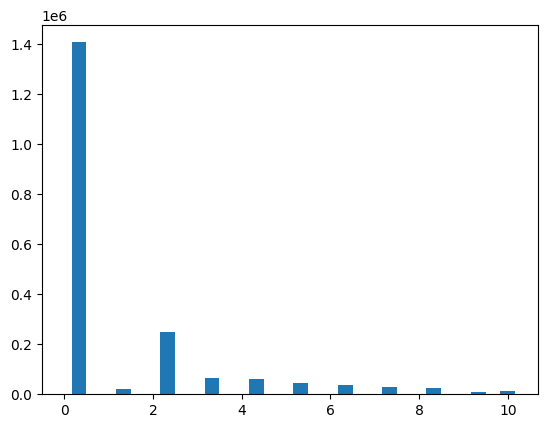

In [4]:
score = df["score"]
plt.hist(score, bins = 30, align = 'right')
weights = np.ones_like(score)/len(score)
plt.hist(score, weights=weights)

In [5]:
not_toxic = df.loc[df["score"] == 0]
level_2_toxic = df.loc[df["score"] == 2]
level_1_toxic = df.loc[df["score"] == 1]
higher_than_2_toxic = df.loc[df["score"] > 2]

In [15]:
df = pd.concat([not_toxic.sample(60_000, random_state=53), level_2_toxic.sample(65_000, random_state=53), level_1_toxic, higher_than_2_toxic])

In [16]:
# shuffle data
df.sample(frac=1)

,Unnamed: 0,id,comment_text,score
1601670,1601673,6082035,"cannot argue about ""fake news"" . it was his pr...",4
1290015,1290017,5691339,lol! the ole lesbaru! they sound like lawnmowe...,3
815047,815048,5118424,all i know is every night i wake up in the mid...,5
127673,127673,398230,it is a biology thing cindy. men and women and...,5
783960,783961,5080240,"how bizarre that stratford, once styling itsel...",2
...,...,...,...,...
1016317,1016319,5360367,the only way to stop a bad toddler with a gun...,5
1205840,1205842,5589624,you cannot believe a word justin says. he has...,5
1476491,1476493,5926887,you miss the point. there is an entire industr...,3
1181838,1181840,5560716,so what? \n\nare you implying that the us popu...,2


(array([0.15872872, 0.04940998, 0.14739095, 0.14472885, 0.14174475,
        0.10434146, 0.08584729, 0.06208107, 0.05964799, 0.04607895]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

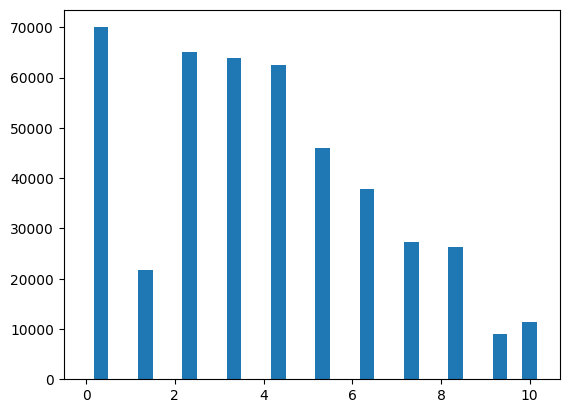

In [17]:
score = df["score"]
plt.hist(score, bins = 30, align = 'right')
weights = np.ones_like(score)/len(score)
plt.hist(score, weights=weights)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
train_df.shape

(356803, 4)